In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# importing Libraries


In [167]:
df = pd.read_csv('/Users/bobyan/Desktop/Kaggle Datasets/MedianHouseholdIncome2015.csv', encoding="latin-1")

In [61]:
df.sample(n=10)

,Geographic Area,City,Median Income
15104,NE,Bloomington village,(X)
10716,LA,Shenandoah CDP,88990
1977,CA,Aptos Hills-Larkin Valley CDP,82500
2629,CA,Lake Davis CDP,-
27638,WA,Malott CDP,35286
12442,MN,Belview city,40357
4123,DE,Smyrna town,54217
9976,KY,Garrison CDP,28261
6260,IL,Cave-In-Rock village,26250
733,AK,Karluk CDP,20938


In [58]:
df.isna().sum()


Geographic Area     0
City                0
Median Income      51
dtype: int64

In [149]:
df_force_drop = df
df_force_drop['Median Income']   = pd.to_numeric(df['Median Income'], errors='coerce')
df_force_drop.dropna()
df_force_drop.describe()

,Median Income
count,27385.000000
mean,51177.890268
std,24887.323132
min,4511.000000
25%,35625.000000
50%,45305.000000
75%,59483.000000
max,244083.000000


In [172]:
df.size

87966

In [171]:
df_force_drop.size




82155

In [169]:
df_state_count = df["Geographic Area"].value_counts()

Total NaN Value: 5811 


Toal Percentage of NaN Values: 6.606%

In [159]:
df_force_drop_state_count = df_force_drop['Geographic Area'].value_counts()

In [173]:
merged_df = pd.merge(df_state_count, df_force_drop_state_count, on='Geographic Area')
merged_df.columns = ['raw', 'After-Dropna']
merged_df

,raw,After-Dropna
Geographic Area,,
PA,1762,1702
TX,1747,1541
CA,1522,1349
IL,1368,1351
OH,1215,1171
NY,1196,1169
MO,1033,974
IA,1008,967
FL,918,885


In [196]:
df_difference = merged_df['raw'] - merged_df['After-Dropna']

df_difference = pd.DataFrame(df_difference)
df_difference.rename_axis('State', inplace=True)
df_difference.columns = ["NaN Value"]
df_difference

,NaN Value
State,
PA,60
TX,206
CA,173
IL,17
OH,44
NY,27
MO,59
IA,41
FL,33


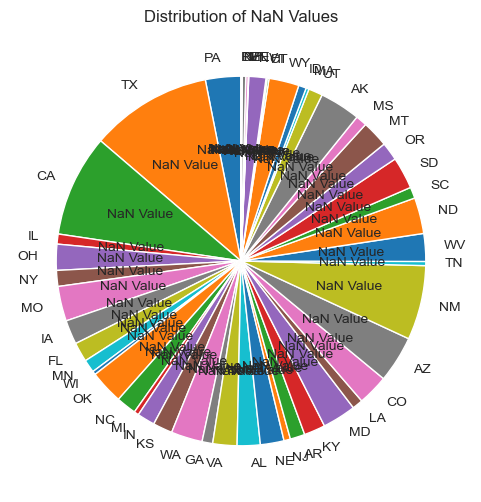

In [191]:
df_difference['NaN Value'].plot.pie(autopct='NaN Value', startangle=90, figsize=(6,6))
plt.title('Distribution of NaN Values')
plt.ylabel('') # Remove default 'Value' label
plt.show()

In [222]:
top_5_rows = df_difference.nlargest(10, 'NaN Value')
top_5_rows.columns

Index(['NaN Value'], dtype='object')

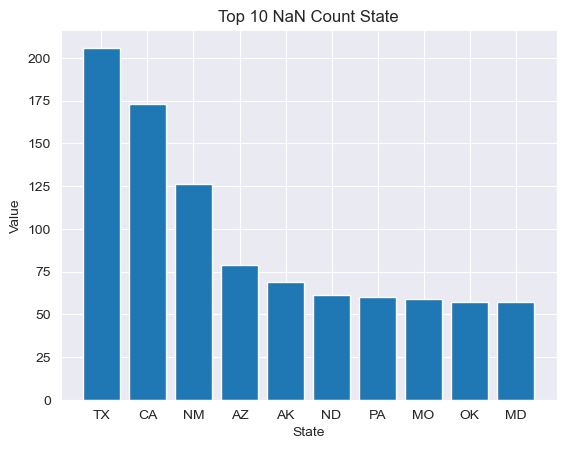

In [223]:
plt.bar(top_5_rows.index, top_5_rows['NaN Value'])  
plt.xlabel("State")
plt.ylabel("Value")
plt.title("Top 10 NaN Count State")
plt.show()

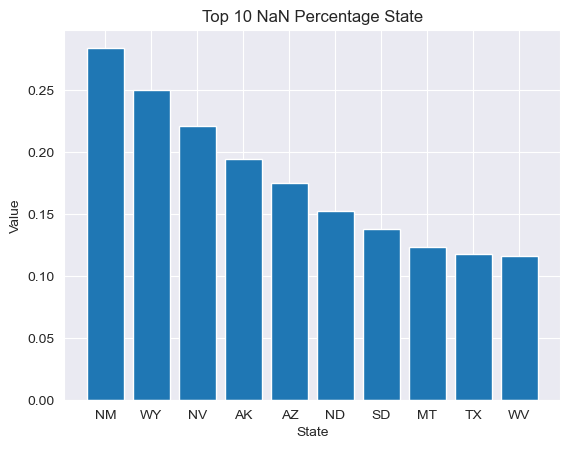

In [224]:
df_percentage = 1 - merged_df['After-Dropna']/merged_df['raw'] 
df_percentage = pd.DataFrame(df_percentage)
df_percentage.rename_axis('State', inplace=True)
df_percentage.columns = ["NaN Percentage"]
top_8_percentage = df_percentage.nlargest(10, 'NaN Percentage')
plt.bar(top_8_percentage.index, top_8_percentage['NaN Percentage'])  
plt.xlabel("State")
plt.ylabel("Value")
plt.title("Top 10 NaN Percentage State")
plt.show()


In [226]:
df_force_drop.columns

Index(['Geographic Area', 'City', 'Median Income'], dtype='object')

In [230]:
df_city = df_force_drop[["Geographic Area",'City', 'Median Income']].copy()
df_city['Median Income'] = pd.to_numeric(df_city['Median Income'], errors='coerce')
df_city = df_city.dropna(subset=['Median Income'])
state_income_stats = df_city.groupby('Geographic Area')['Median Income'].agg(
    avg_income='mean',
    median_income='median',
    city_count='count'   # optional: how many cities per state
).reset_index()


  Geographic Area    avg_income  median_income  city_count
0              AK  52099.594406        50000.0         286
1              AL  40577.309524        38304.0         546
2              AR  35593.408915        33750.0         516
3              AZ  42495.666667        39000.0         372
4              CA  62097.352113        54667.0        1349


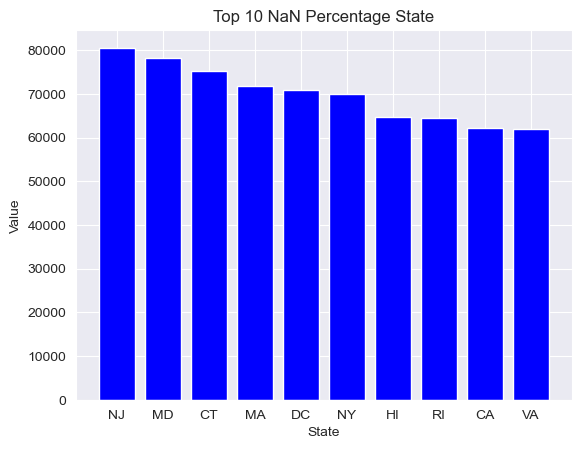

In [233]:
top_10_percentage = state_income_stats.nlargest(10, 'avg_income')
plt.bar(top_10_percentage['Geographic Area'], top_10_percentage['avg_income'], color='blue')  
plt.xlabel("State")
plt.ylabel("Value")
plt.title("Top 10 NaN Percentage State")
plt.show()

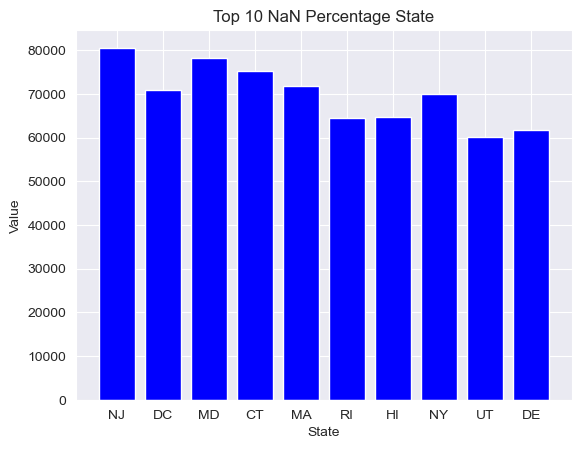

In [234]:
top_10_percentage = state_income_stats.nlargest(10, 'median_income')
plt.bar(top_10_percentage['Geographic Area'], top_10_percentage['avg_income'], color='blue')  
plt.xlabel("State")
plt.ylabel("Value")
plt.title("Top 10 NaN Percentage State")
plt.show()